Association Analysis - Apriori Algorithm

For this project, following items are used:
* Jupyter notebook, 
* the 'Random Shopping cart' dataset [01],
* and the Apriori Algorithm (apriory.py)[02]. Note that the apriory.py file is modified to run with Python 3.

## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [6]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [7]:
# Import your Libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame


### Task 1: DataSet Preprocess
Firstly, the dataset 'dataset_group.csv' is modified to look like the toyDS.csv.  Each transaction is at one line with a variable length.  Discarding the date attribute (1st attribute) from the dataset.  So that the dataset transaction#4 looks like: 
    
    cereals,juice,lunch meat,soda,toilet paper,all-purpose

Exported the modified dataset in a file named 'dataset.csv'.

Used pandas to Read and Print the first 7 transactions of the 'dataset.csv'.


ScreenShot of the toyDS.csv


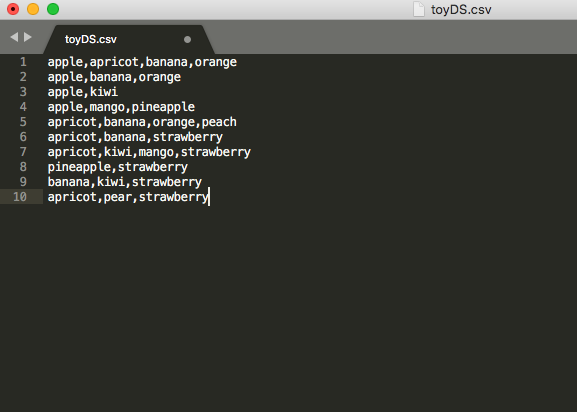

In [3]:
from IPython.display import Image
print ('ScreenShot of the toyDS.csv')
Image("SampleScreen01.png")

In [26]:
# # # # # # # # #  Code for Task 1 # # # # # # # # #

#Reading the 'dataset_group.csv' file into a Pandas dataFrame
ds = pd.read_csv('dataset_group.csv', header= None)

#To remove the duplicate items in each row
ds.drop_duplicates(subset=None, inplace=True)

#Dropping the date attribute(first attribute) from the dataset
new_ds= ds.drop([0], axis=1)

#Modifying the dataset using groupby and apply
new_ds1 = new_ds.groupby(1)[2].apply(lambda x: "%s" % ', '.join(x))

#Exporting the modified dataset in a file named 'dataset.csv'.
new_ds1.to_csv('dataset.csv', sep='\t', encoding='utf-8', index = False, header = None)

#Reading the 'dataset.csv' file into the Pandas dataFrame 
df = pd.read_csv('dataset.csv', sep='delimiter', header=None, engine = 'python')

### To display full(non-truncated) dataFrame information
pd.set_option('display.max_colwidth', -1) 

# To start the row index from '1' instead of '0'
df.index = df.index + 1    

#Printing the first 7 transactions of the 'dataset.csv'
df.head(7)  

,0
1,"yogurt, pork, sandwich bags, lunch meat, all- purpose, flour, soda, butter, vegetables, beef, aluminum foil, dinner rolls, shampoo, mixes, soap, laundry detergent, ice cream"
2,"toilet paper, shampoo, hand soap, waffles, vegetables, cheeses, mixes, milk, sandwich bags, laundry detergent, dishwashing liquid/detergent, individual meals, yogurt, cereals, aluminum foil, tortillas"
3,"soda, pork, soap, ice cream, toilet paper, dinner rolls, hand soap, spaghetti sauce, milk, ketchup, sandwich loaves, poultry, vegetables, laundry detergent, bagels, shampoo, lunch meat, cereals, cheeses, eggs"
4,"cereals, juice, lunch meat, soda, toilet paper, all- purpose"
5,"sandwich loaves, pasta, tortillas, mixes, hand soap, toilet paper, vegetables, paper towels, flour, pork, poultry, eggs, spaghetti sauce, milk, waffles, individual meals, dinner rolls, all- purpose, soda, yogurt"
6,"laundry detergent, toilet paper, eggs, vegetables, bagels, dishwashing liquid/detergent, cereals, paper towels, butter, shampoo, soap, pasta, coffee/tea, poultry, aluminum foil, spaghetti sauce, ketchup, all- purpose, milk"
7,"individual meals, paper towels, tortillas, vegetables, milk, ice cream, juice, dishwashing liquid/detergent, soap, sandwich bags, pasta, ketchup, all- purpose, yogurt, mixes, toilet paper, beef, eggs, spaghetti sauce, fruits"


In [24]:
print ('# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #') 
print ('Case 1 (minimum support=0.17 and minimum confidence=0.68)')
print ('Case 1 Reasoning:  When the minimum support is 0.17 number of rules generated are 36. The maximum support is 0.665 which has only vegetables. This means vegetables is the most frequent itemset. The strongest rule is when sugar is bought vegetables are also bought and when yogurt is bought vegetables are also bought, both having the highest confidence of 0.767')
print ('Case 1 Output:' )
%run apriori.py -f dataset.csv -s 0.17 -c 0.68

# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #
Case 1 (minimum support=0.17 and minimum confidence=0.68)
Case 1 Reasoning:  When the minimum support is 0.17 number of rules generated are 36. The maximum support is 0.665 which has only vegetables. This means vegetables is the most frequent itemset. The strongest rule is when sugar is bought vegetables are also bought and when yogurt is bought vegetables are also bought, both having the highest confidence of 0.767
Case 1 Output:

------------ITEMS-----------------
item: (' poultry', ' dinner rolls') , 0.174
item: (' vegetables', ' pork') , 0.230
item: (' vegetables', ' tortillas') , 0.233
item: (' flour', ' vegetables') , 0.234
item: (' vegetables', ' sandwich loaves') , 0.234
item: (' vegetables', ' hand soap') , 0.235
item: (' toilet paper', ' vegetables') , 0.240
item: (' vegetables', ' ketchup') , 0.241
item: (' individual meals', ' vegetables') , 0.241
item: (' vegetables', ' pasta') , 0.242
item: (' all- purpose', ' v

In [23]:
print ('# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #') 
print ('Case 2 (minimum support=0.10 and minimum confidence=0.40)') 
print ('Case 2 Reasoning: When the minimum support is 0.10 and minimum confidence is 0.40(lower than Case:1) the number of frequent itemsets and number of rules are increased but higher confidence rules are also generated . With vegetables as the most frequent itemset. The strongest rule here is with waffles, dinner rolls ==> vegetables are also bought with a confidence of 0.836')
print ('Case 2 Output:' )
%run apriori.py -f dataset.csv -s 0.10 -c 0.40

# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #
Case 2 (minimum support=0.10 and minimum confidence=0.40)
Case 2 Reasoning: When the minimum support is 0.10 and minimum confidence is 0.40(lower than Case:1) the number of frequent itemsets and number of rules are increased but higher confidence rules are also generated . With vegetables as the most frequent itemset. The strongest rule here is with waffles, dinner rolls ==> vegetables are also bought with a confidence of 0.836
Case 2 Output:

------------ITEMS-----------------
item: (' vegetables', ' hand soap', ' waffles') , 0.100
item: (' cereals', ' vegetables', ' sugar') , 0.100
item: (' all- purpose', ' vegetables', ' pasta') , 0.100
item: (' vegetables', ' sandwich loaves', ' coffee/tea') , 0.100
item: (' vegetables', ' fruits', ' spaghetti sauce') , 0.100
item: (' vegetables', ' cheeses', ' shampoo') , 0.100
item: (' vegetables', ' waffles', ' mixes') , 0.100
item: (' toilet paper', ' vegetables', ' coffee/tea') , 0.1

item: (' cheeses', ' dishwashing liquid/detergent') , 0.143
item: (' soap', ' spaghetti sauce') , 0.143
item: (' cheeses', ' lunch meat') , 0.143
item: (' bagels', ' cereals') , 0.143
item: (' sandwich bags', ' beef') , 0.143
item: (' all- purpose', ' waffles') , 0.143
item: (' cereals', ' shampoo') , 0.143
item: (' ice cream', ' laundry detergent') , 0.143
item: (' yogurt', ' pasta') , 0.143
item: (' soap', ' cereals') , 0.143
item: (' soap', ' dinner rolls') , 0.143
item: (' soda', ' spaghetti sauce') , 0.143
item: (' cheeses', ' beef') , 0.143
item: (' aluminum foil', ' dinner rolls') , 0.143
item: (' milk', ' soap') , 0.143
item: (' toilet paper', ' paper towels') , 0.144
item: (' yogurt', ' coffee/tea') , 0.144
item: (' ice cream', ' dinner rolls') , 0.144
item: (' sugar', ' dinner rolls') , 0.144
item: (' pasta', ' soap') , 0.144
item: (' toilet paper', ' yogurt') , 0.144
item: (' sandwich bags', ' soap') , 0.144
item: (' cheeses', ' spaghetti sauce') , 0.144
item: (' beef', ' lu

Rule: (' vegetables', ' coffee/tea') ==> (' dishwashing liquid/detergent',) , 0.408
Rule: (' pasta',) ==> (' coffee/tea',) , 0.408
Rule: (' yogurt',) ==> (' mixes',) , 0.408
Rule: (' yogurt',) ==> (' sugar',) , 0.408
Rule: (' cheeses',) ==> (' individual meals',) , 0.408
Rule: (' cheeses',) ==> (' eggs',) , 0.408
Rule: (' cheeses',) ==> (' dinner rolls',) , 0.408
Rule: (' soda', ' vegetables') ==> (' dishwashing liquid/detergent',) , 0.408
Rule: (' milk',) ==> (' toilet paper',) , 0.408
Rule: (' milk',) ==> (' ice cream',) , 0.408
Rule: (' waffles',) ==> (' dinner rolls',) , 0.408
Rule: (' waffles',) ==> (' spaghetti sauce',) , 0.408
Rule: (' sandwich loaves',) ==> (' spaghetti sauce',) , 0.408
Rule: (' yogurt', ' vegetables') ==> (' laundry detergent',) , 0.408
Rule: (' yogurt', ' vegetables') ==> (' mixes',) , 0.408
Rule: (' yogurt', ' vegetables') ==> (' paper towels',) , 0.408
Rule: (' yogurt', ' vegetables') ==> (' flour',) , 0.408
Rule: (' paper towels',) ==> (' shampoo',) , 0.40

Rule: (' ice cream',) ==> (' cheeses',) , 0.428
Rule: (' milk', ' vegetables') ==> (' cereals',) , 0.428
Rule: (' soda', ' vegetables') ==> (' laundry detergent',) , 0.428
Rule: (' vegetables', ' lunch meat') ==> (' yogurt',) , 0.428
Rule: (' vegetables', ' lunch meat') ==> (' cheeses',) , 0.428
Rule: (' vegetables', ' lunch meat') ==> (' dinner rolls',) , 0.428
Rule: (' vegetables', ' waffles') ==> (' soda',) , 0.428
Rule: (' vegetables', ' lunch meat') ==> (' soap',) , 0.428
Rule: (' pasta',) ==> (' dinner rolls',) , 0.428
Rule: (' milk',) ==> (' cereals',) , 0.428
Rule: (' spaghetti sauce',) ==> (' lunch meat',) , 0.428
Rule: (' spaghetti sauce',) ==> (' cereals',) , 0.428
Rule: (' vegetables', ' coffee/tea') ==> (' dinner rolls',) , 0.429
Rule: (' vegetables', ' coffee/tea') ==> (' yogurt',) , 0.429
Rule: (' vegetables', ' coffee/tea') ==> (' soap',) , 0.429
Rule: (' flour', ' vegetables') ==> (' soap',) , 0.429
Rule: (' aluminum foil',) ==> (' poultry',) , 0.429
Rule: (' toilet pa

Rule: (' ice cream', ' paper towels') ==> (' vegetables',) , 0.718
Rule: (' cheeses', ' dishwashing liquid/detergent') ==> (' vegetables',) , 0.718
Rule: (' individual meals', ' aluminum foil') ==> (' vegetables',) , 0.718
Rule: (' milk',) ==> (' vegetables',) , 0.718
Rule: (' toilet paper', ' lunch meat') ==> (' vegetables',) , 0.719
Rule: (' pasta', ' waffles') ==> (' vegetables',) , 0.719
Rule: (' fruits', ' dishwashing liquid/detergent') ==> (' vegetables',) , 0.719
Rule: (' ice cream', ' dishwashing liquid/detergent') ==> (' vegetables',) , 0.720
Rule: (' sandwich bags', ' ketchup') ==> (' vegetables',) , 0.720
Rule: (' flour',) ==> (' vegetables',) , 0.721
Rule: (' all- purpose', ' pasta') ==> (' vegetables',) , 0.722
Rule: (' soda', ' juice') ==> (' vegetables',) , 0.722
Rule: (' bagels', ' mixes') ==> (' vegetables',) , 0.722
Rule: (' coffee/tea', ' dishwashing liquid/detergent') ==> (' vegetables',) , 0.722
Rule: (' pork', ' coffee/tea') ==> (' vegetables',) , 0.723
Rule: (' p

In [25]:
print ('# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #') 
print ('Case 3 (minimum support=0.12 and minimum confidence=0.80)')
print ('Case 3 Reasoning: Here with lowest minimum support and highest minimum confidence (compared to two other cases ) the highest confidence again reaches 0.836 stating that with waffles, dinner rolls ==> vegetables are also bought. Here even with lower minimum support ang high minimum confidence, rules with high confidence are generated. ')
print ('Case 3 Output:' )
%run apriori.py -f dataset.csv -s 0.12 -c 0.80

# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #
Case 3 (minimum support=0.12 and minimum confidence=0.80)
Case 3 Reasoning: Here with lowest minimum support and highest minimum confidence (compared to two other cases ) the highest confidence again reaches 0.836 stating that with waffles, dinner rolls ==> vegetables are also bought. Here even with lower minimum support ang high minimum confidence, rules with high confidence are generated. 
Case 3 Output:

------------ITEMS-----------------
item: (' spaghetti sauce', ' shampoo') , 0.120
item: (' flour', ' beef') , 0.120
item: (' fruits', ' tortillas') , 0.120
item: (' pasta', ' butter') , 0.120
item: (' hand soap', ' ketchup') , 0.120
item: (' vegetables', ' waffles', ' soap') , 0.120
item: (' eggs', ' vegetables', ' dishwashing liquid/detergent') , 0.120
item: (' juice', ' hand soap') , 0.121
item: (' fruits', ' hand soap') , 0.121
item: (' flour', ' shampoo') , 0.121
item: (' all- purpose', ' sandwich bags') , 0.121
item: 

# References

[01] https://www.kaggle.com/acostasg/random-shopping-cart

[02] https://github.com/asaini/Apriori

[03] https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin

[04] https://stackoverflow.com/questions/17841149/pandas-groupby-how-to-get-a-union-of-strings

[05] https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html#Aggregate,-Filter,-Transform,-Apply